<a href="https://colab.research.google.com/github/CsonVass/lpr-image-processing-hw/blob/main/ALPR_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

# <strong>Képfeldolgozás házi feladat - Automatikus rendszámtábla felismerő alkalmazás</strong>
</div>

* Jakosa Emma Kloé
* Lanczki Enikő Bella
* Ifkovics Barnabás
* Vass Csongor

<div class="markdown-google-sans">

## <strong>Környezet inicializálása, adatok betöltése</strong>
</div>

In [2]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
import pickle
import random
import urllib
import imp
import tensorflow as tf
from keras import layers
from keras import backend as K
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.nn_ops import softmax

In [3]:
from google.colab import drive
drive.mount('/content/drive')

DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/ALPR'
# path_to_data = DRIVE_PATH + '/KF_HF_database.csv';
# data_csv = pd.read_csv(path_to_data, header=None, on_bad_lines='skip', sep=';')

# plateTable = data_csv.iloc[0:,0:1].values
# linksTable = data_csv.iloc[0:,2:].values


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
#        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
#        'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
#        'Accept-Encoding': 'none',
#        'Accept-Language': 'en-US,en;q=0.8',
#        'Connection': 'keep-alive'}

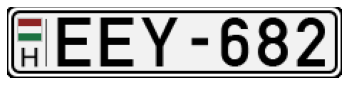

In [ ]:
# req_ = urllib.request.Request(linksTable[0][0], headers=hdr)
# req = urllib.request.urlopen(req_)
# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img_1 = cv2.imdecode(arr, -1)


# plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
# plt.axis("off")
# plt.show()

In [ ]:
# np.set_printoptions(threshold=sys.maxsize)
# print(plateTable)

In [ ]:
# plate_images = []
# high_images = []
# low_images = []

# for i in linksTable:
#   req = urllib.request.urlopen(urllib.request.Request(i[0], headers=hdr))
#   arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#   plate_images.append(cv2.imdecode(arr, -1))

#   req = urllib.request.urlopen(urllib.request.Request(i[1], headers=hdr))
#   arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#   high_images.append(cv2.imdecode(arr, -1))

#   req = urllib.request.urlopen(urllib.request.Request(i[2], headers=hdr))
#   arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#   low_images.append(cv2.imdecode(arr, -1))

In [ ]:
#options = {"model": "cfg/yolo-1c.cfg",
#           "load": "bin/yolo.weights",
#           "batch": 8,
#           "epoch": 100,
#           "gpu": 0.9,
#           "train": True,
#           "annotation": "./data/AnnotationsXML/007/",
#           "dataset": "./data/Images/007/"}
#tfnet = TFNet(options)
#tfnet.train()
#tfnet.savepb()

In [43]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/ALPR/data') 
plates = list(data_dir.glob('train/*_p.png'))
high = list(data_dir.glob('train/*_h.jpg'))
low = list(data_dir.glob('train/*_l.jpg'))

In [44]:
from IPython.core import extensions
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

# data_root='/content/drive/MyDrive/Colab Notebooks/ALPR'
# TRAINING_DATA_DIR = str(data_root)
# datagen_kwargs = dict(rescale=1./255, validation_split=.20)
# valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
# IMAGE_SHAPE = (224, 224)

# valid_generator = valid_datagen.flow_from_directory(
# TRAINING_DATA_DIR,
# subset="validation",
# shuffle=True,
# target_size=IMAGE_SHAPE
# )

# batch_size = 32
# img_height = 180
# img_width = 180

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

plate_images = []
high_images = []
low_images = []

for i in plates:
  plate_images.append(PIL.Image.open(i))

for i in high:
  high_images.append(PIL.Image.open(i))
for i in low:
  low_images.append(PIL.Image.open(i))



In [12]:
class_names = train_ds.class_names
print(class_names)

['train', 'validation']
